# Test
This script serve as an example on how to use the package, and as a test in developing it

Created on 04.06.2024
@author: Mathias Berg Rosendal, PhD Student at DTU Management (Energy Economics & Modelling)

In [1]:
### Load the local package
import sys
sys.path.append('../')
from src.pybalmorel import IncFile, MainResults 
from src.pybalmorel.functions import symbol_to_df
import pandas as pd


## 1. Working with Outputs

This section presents examples of how to work with the outputs from Balmorel

### 1.1 MainResults

The main output from Balmorel is MainResults.gdx, which may be loaded from one path (demanding different filenames, e.g., MainResults_SC1.gdx, MainResults_SC2.gdx, etc.) or several paths (demanding you to specify scenario names, if they are not on the _SC1, _SC2, ... format as mentioned above)

In [2]:
### 1.1.1 Loading one scenario
res = MainResults(files='MainResults_ScenarioName.gdx', paths='Files')

# Getting a result in DataFrame format
res.get_result('PRO_YCRAGF')

--- Warning: The GAMS version (45.5.0) differs from the API version (46.5.0).


,Scenario,Year,Country,Region,Area,Generation,Fuel,Commodity,Technology,Unit,Value
0,ScenarioName,2030,NORWAY,NO1,NO1_A1,MAGICG,MAGICF,ELECTRICITY,CONDENSING,TWh,70.080000
1,ScenarioName,2030,NORWAY,NO1,NO1_A2,MAGICG,MAGICF,ELECTRICITY,CONDENSING,TWh,70.080000
2,ScenarioName,2030,NORWAY,NO1,NO1_A2,GNR_BO_ELEC_E-99,ELECTRIC,HEAT,ELECT-TO-HEAT,TWh,0.336824
3,ScenarioName,2030,NORWAY,NO1,NO1_A2,GNR_BO_ELEC_E-99_LS-10-MW-FEED_Y-2030,ELECTRIC,HEAT,ELECT-TO-HEAT,TWh,2024.163155
4,ScenarioName,2030,NORWAY,NO1,NO1_A2,GNR_HS_HEAT_PIT_L-DEC_E-70_Y-2030,HEAT,HEAT,INTERSEASONAL-HEAT-STORAGE,TWh,4721.421720
...,...,...,...,...,...,...,...,...,...,...,...
777,ScenarioName,2050,DENMARK,DK2,DK2_IND-LT-DH,GNR_HS_HEAT_WTR-TANK_LS_E-95_Y-2010,HEAT,HEAT,INTRASEASONAL-HEAT-STORAGE,TWh,0.041294
778,ScenarioName,2050,DENMARK,DK2,DK2_IND-MT-NODH,MAGICG,MAGICF,ELECTRICITY,CONDENSING,TWh,70.080000
779,ScenarioName,2050,DENMARK,DK2,DK2_IND-MT-NODH,GNR_BO_ELEC_E-99_LS-10-MW-FEED_Y-2050,ELECTRIC,HEAT,ELECT-TO-HEAT,TWh,2.388830
780,ScenarioName,2050,DENMARK,DK2,DK2_IND-MT-DH,MAGICG,MAGICF,ELECTRICITY,CONDENSING,TWh,70.080000


In [3]:
### 1.1.2 Loading several scenarios
res = MainResults(files=['MainResults_ScenarioName.gdx', 'MainResults_ScenarioName.gdx'], paths='Files', scenario_names=['SC1', 'SC2'])

res.get_result('G_CAP_YCRAF')

--- Warning: The GAMS version (45.5.0) differs from the API version (46.5.0).


,Scenario,Year,Country,Region,Area,Generation,Fuel,Commodity,Technology,Category,Unit,Value
0,SC1,2030,NORWAY,NO1,NO1_A1,MAGICG,MAGICF,ELECTRICITY,CONDENSING,EXOGENOUS,GW,8.000000
1,SC1,2030,NORWAY,NO1,NO1_A1,GNR_RES_WTR_NOPMP_MC-01,WATER,ELECTRICITY,HYDRO-RESERVOIRS,EXOGENOUS,GW,0.160000
2,SC1,2030,NORWAY,NO1,NO1_A1,GNR_RES_WTR_NOPMP_MC-02,WATER,ELECTRICITY,HYDRO-RESERVOIRS,EXOGENOUS,GW,0.160000
3,SC1,2030,NORWAY,NO1,NO1_A1,GNR_RES_WTR_NOPMP_MC-03,WATER,ELECTRICITY,HYDRO-RESERVOIRS,EXOGENOUS,GW,0.160000
4,SC1,2030,NORWAY,NO1,NO1_A1,GNR_RES_WTR_NOPMP_MC-04,WATER,ELECTRICITY,HYDRO-RESERVOIRS,EXOGENOUS,GW,0.160000
...,...,...,...,...,...,...,...,...,...,...,...,...
10111,SC2,2050,DENMARK,DK2,DK2_IND-MT-DH,GNR_ST_MSW_BP_E-25,MUNIWASTE,ELECTRICITY,CHP-BACK-PRESSURE,DECOMMISSIONING,GW,-0.007400
10112,SC2,2050,DENMARK,DK2,DK2_IND-MT-DH,GNR_ST_MSW_BP_E-27,MUNIWASTE,HEAT,CHP-BACK-PRESSURE,EXOGENOUS,GW,0.065594
10113,SC2,2050,DENMARK,DK2,DK2_IND-MT-DH,GNR_ST_MSW_BP_E-27,MUNIWASTE,HEAT,CHP-BACK-PRESSURE,DECOMMISSIONING,GW,-0.065594
10114,SC2,2050,DENMARK,DK2,DK2_IND-MT-DH,GNR_ST_MSW_BP_E-27,MUNIWASTE,ELECTRICITY,CHP-BACK-PRESSURE,EXOGENOUS,GW,0.019400


In [4]:
### 1.1.3 Plotting bar charts with an interactive gui
res.bar_chart()

GridBox(children=(Dropdown(description='Table:', options=('F_CONS_YCRA', 'F_CONS_YCRAST', 'G_CAP_YCRAF', 'G_ST…

Output()

Stack(children=(GridBox(children=(SelectMultiple(description='Scenario', index=(0,), options=('None',), value=…

Output()

Output()

Button(description='Plot', icon='check', style=ButtonStyle(), tooltip='Click to plot')

Output()

Note that the following flows have not been scaled to fit annual flows

No transmission data
Electricity Demand: [TWh]
DIST_LOSSES  =  0.0
ENDOGENOUS_ELECT2HEAT  =  8.58
ENDO_H2  =  0.02
EXOGENOUS  =  0.07
TRANS_LOSSES  =  0.0
No defined colour for MAGICF


c:\Users\mathi\gitRepos\pybalmorel\tests\..\src\pybalmorel\plotting\production_profile.py:150: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  fPr = fProd[idx].pivot_table(values='Val', index=['SSS', 'TTT'], columns=[columns],aggfunc=sum)
c:\Users\mathi\gitRepos\pybalmorel\tests\..\src\pybalmorel\plotting\production_profile.py:216: FutureWarning: The provided callable <function sum at 0x0000018C623C8A60> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  fD = fD.aggregate({'Val' : np.sum})
c:\Users\mathi\gitRepos\pybalmorel\tests\..\src\pybalmorel\plotting\production_profile.py:262: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum.

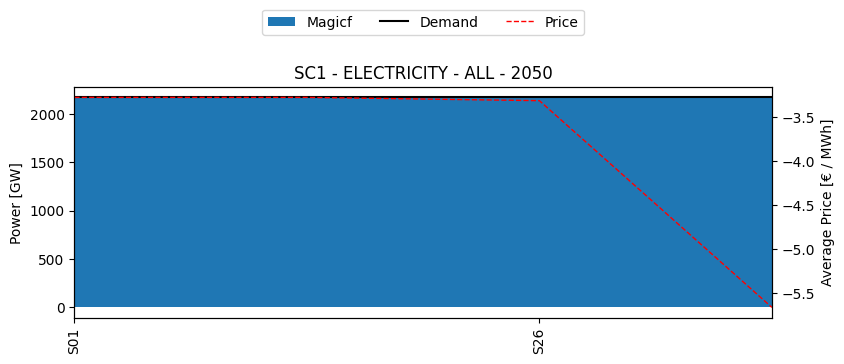

In [6]:
### 1.1.4 Plotting production profiles
res.plot_profile(scenario='SC1', year=2050, commodity='Electricity', columns='Fuel',
                 region='All')

### 1.2 Other General Functions

In [11]:
### Using symbol_to_df
import gams
import os
ws = gams.GamsWorkspace()
db = ws.add_database_from_gdx(os.path.abspath('files/MainResults_ScenarioName.gdx'))

fuel = symbol_to_df(db, 'F_CONS_YCRA')
fuel        

--- Warning: The GAMS version (45.5.0) differs from the API version (46.5.0).


,Year,Country,Region,Area,Generation,Fuel,Technology,Unit,Value
0,2030,NORWAY,NO1,NO1_A1,MAGICG,MAGICF,CONDENSING,TWh,70.080000
1,2030,NORWAY,NO1,NO1_A2,MAGICG,MAGICF,CONDENSING,TWh,70.080000
2,2030,NORWAY,NO1,NO1_A2,GNR_BO_ELEC_E-99,ELECTRIC,ELECT-TO-HEAT,TWh,0.340226
3,2030,NORWAY,NO1,NO1_A2,GNR_BO_ELEC_E-99_LS-10-MW-FEED_Y-2030,ELECTRIC,ELECT-TO-HEAT,TWh,2044.609247
4,2030,NORWAY,NO1,NO1_A2,GNR_HS_HEAT_PIT_L-DEC_E-70_Y-2030,HEAT,INTERSEASONAL-HEAT-STORAGE,TWh,6744.888171
...,...,...,...,...,...,...,...,...,...
772,2050,DENMARK,DK2,DK2_IND-LT-DH,GNR_HS_HEAT_WTR-TANK_LS_E-95_Y-2010,HEAT,INTRASEASONAL-HEAT-STORAGE,TWh,0.042137
773,2050,DENMARK,DK2,DK2_IND-MT-NODH,MAGICG,MAGICF,CONDENSING,TWh,70.080000
774,2050,DENMARK,DK2,DK2_IND-MT-NODH,GNR_BO_ELEC_E-99_LS-10-MW-FEED_Y-2050,ELECTRIC,ELECT-TO-HEAT,TWh,2.412959
775,2050,DENMARK,DK2,DK2_IND-MT-DH,MAGICG,MAGICF,CONDENSING,TWh,70.080000


## 2. Inputs

This section presents examples of how to work with inputs to Balmorel

### 2.1 .inc Files

In [5]:
### 2.1.1 Create an .inc file

# Initiate .inc file class
DE = IncFile(name='DE',
            prefix="TABLE   DE1(RRR,DEUSER,YYY)   'Annual electricity consumption (MWh)'\n",
            suffix="\n;\nDE(YYY,RRR,DEUSER) = DE1(RRR,DEUSER,YYY);",
            path='files')


# Create annual electricity demand 
DE.body = pd.DataFrame(index=['DK1', 'DK2'], columns=[2030, 2040, 2050],
                       data=[[17e6, 20e6, 25e6],
                            [14e6, 17e6, 20e6]])

# Fix the index format (in this case, append the DEUSER set to RRR)
DE.body.index += ' . RESE'

# Save .inc file to path (will save as ./Balmorel/sc1/data/DE.inc)
DE.save()